<a href="https://colab.research.google.com/github/riya-29/DataAnalytics/blob/main/CropProductionInIndia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'crop_production.csv')

print("Sum of null values in each column: ",df.isnull().sum())

print("\nBefore dropping null values \nNo. of Rows & Column: ",df.shape)
data = df.dropna()
print("\nAfter dropping null values \nNo. of Rows & Column: ",data.shape)

Sum of null values in each column:  State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       9
dtype: int64

Before dropping null values 
No. of Rows & Column:  (706, 7)

After dropping null values 
No. of Rows & Column:  (697, 7)


In [6]:
df = data.groupby(['State_Name', 'Crop_Year','Crop']).count()
df

District_Name  Season  \
State_Name                  Crop_Year Crop                                     
Andaman and Nicobar Islands 2000      Arecanut                     1       1   
                                      Dry ginger                   1       1   
                                      Sugarcane                    1       1   
                                      Sweet potato                 1       1   
                            2015      Banana                       1       1   
...                                                              ...     ...   
Uttarakhand                 2005      Rice                         3       3   
                                      Small millets                1       1   
                                      Sugarcane                    1       1   
                                      Total foodgrain              9       9   
                                      Wheat                        2       2   

                                                       Area  Production  
State_Name                  Crop_Year Crop                               
Andaman and Nicobar Islands 2000      Arecanut            1           1  
                                      Dry ginger          1           1  
                                      Sugarcane           1           1  
                                      Sweet potato        1           1  
                            2015      Banana              1           1  
...                                                     ...         ...  
Uttarakhand                 2005      Rice                3           3  
                                      Small millets       1           1  
                                      Sugarcane           1           1  
                                      Total foodgrain     9           9  
                                      Wheat               2           2  

[341 rows x 4 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


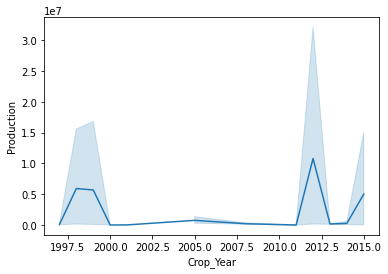

In [7]:
# How has crop production yield changed from 1997 to 2015
sns.lineplot(data["Crop_Year"],data["Production"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

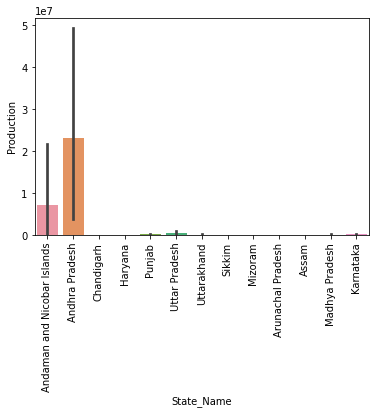

In [8]:
# Over time, what are the major production trends been across the states
sns.barplot(data["State_Name"],data["Production"])
plt.xticks(rotation=90)

            Crop_Year      Area  Production
Crop_Year    1.000000  0.179482   -0.012323
Area         0.179482  1.000000   -0.006635
Production  -0.012323 -0.006635    1.000000


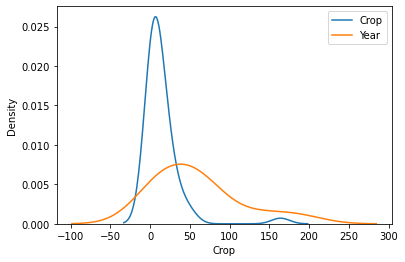

In [9]:
# Are there any patterns that can be observed between total crop production and value of production every year? 
co = data.corr()
print(co)
sns.kdeplot(data["Crop"].value_counts(),label="Crop")
sns.kdeplot(data["Crop_Year"].value_counts(),label="Year")
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


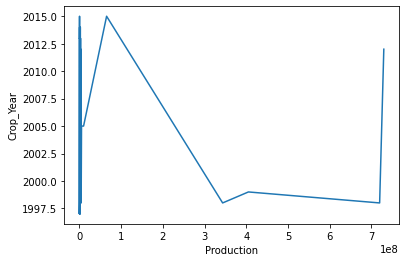

In [10]:
# How has value of production, which in some sense could be tied to demand, changed every year?
sns.lineplot(data["Production"],data["Crop_Year"])

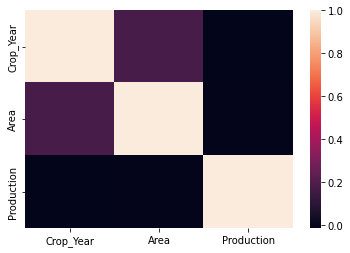

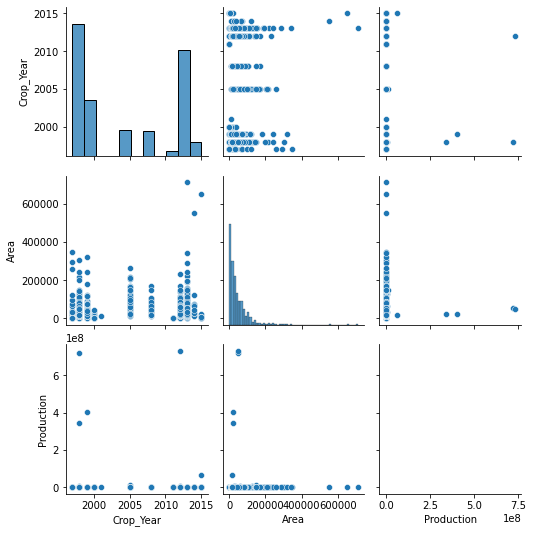

In [11]:
# Plot the relationship between numerical variables using pair plots and correlation plots
sns.heatmap(co,xticklabels=co.columns,yticklabels=co.columns)
sns.pairplot(data)

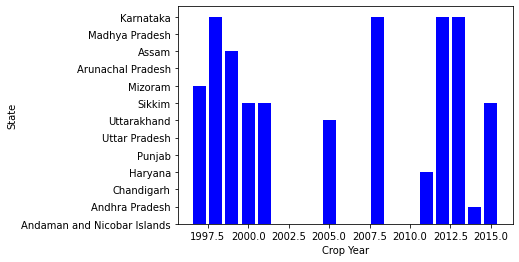

In [12]:
# Plot the categorical features - state and year
a=pd.Series(data['Crop_Year'])
b=pd.Series(data['State_Name'])
plt.bar(a,b,color='b')
plt.xlabel("Crop Year")
plt.ylabel("State")
plt.show()

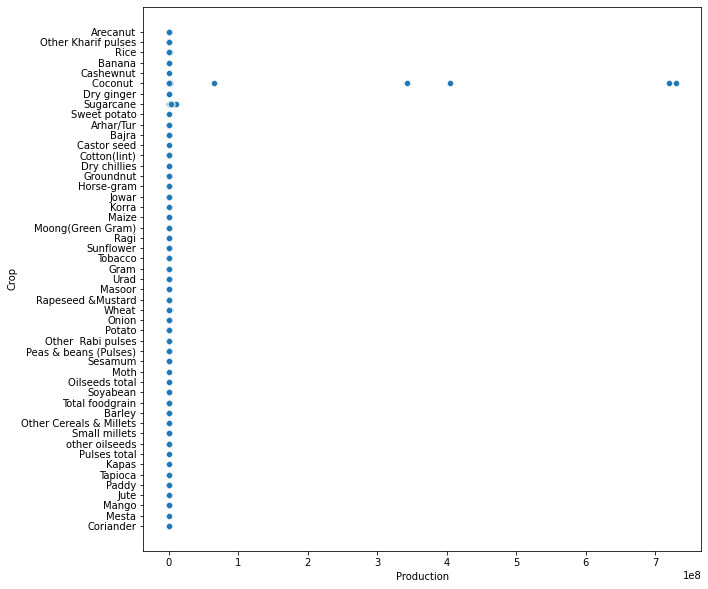

In [13]:
# See what effect, the declining production trend has had on the value of production
plt.figure(figsize=(10,10))
sns.scatterplot(data=data, x="Production", y="Crop")

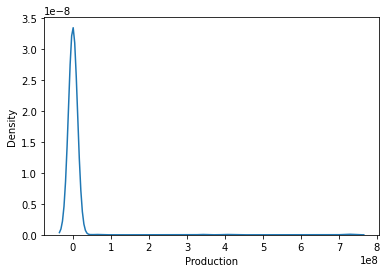

In [14]:
sns.kdeplot(data["Production"])